In [1]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
from google.colab import drive
drive.mount('/content/drive')
# Read CSV and define schema
df = pl.read_csv('/content/drive/MyDrive/output.csv')
schema = {
    "date": pl.Utf8,
    "sales": pl.Int64,
    "revenue": pl.Int64,
    "stock": pl.Int64,
    "price": pl.Float64
}
df = df.select(schema.keys()).cast(schema)

# Convert the date column to Date
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y-%m-%d"))

# Group by date and aggregate total sales
df_grouped = df.group_by("date").agg([pl.sum("sales").alias("total_sales")])

# Convert to Pandas and rename columns for NeuralProphet
df_pandas = df_grouped.to_pandas()
df_pandas.rename(columns={"date": "ds", "total_sales": "y"}, inplace=True)
df_pandas['ds'] = pd.to_datetime(df_pandas['ds'])
df_pandas.sort_values(by='ds', inplace=True)

Mounted at /content/drive


In [2]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
scaler = MinMaxScaler(feature_range=(0, 1))
df_pandas['y_scaled'] = scaler.fit_transform(df_pandas[['y']])

# Prepare data for GRU
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 30  # Lookback window
data = df_pandas['y_scaled'].values
X, y = create_sequences(data, SEQ_LENGTH)

# Split into train and test sets
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Reshape input to [samples, time steps, features]
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                          │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0102 - val_loss: 0.0012
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0044 - val_loss: 0.0012
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0056 - val_loss: 0.0013
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

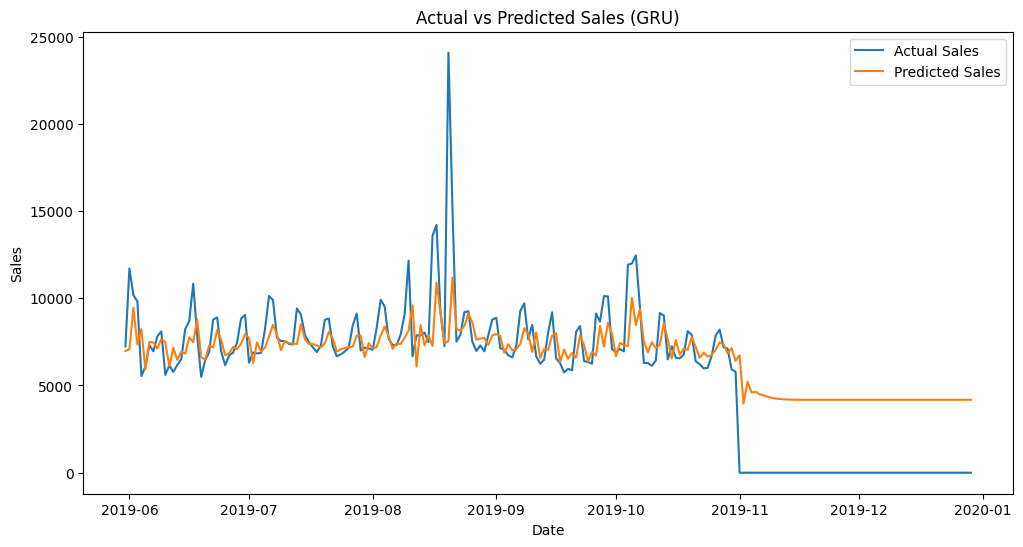

In [8]:
model = Sequential([
    GRU(64, input_shape=(SEQ_LENGTH, 1), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# -------------------------------------
# Step 4: Train the Model
# -------------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# -------------------------------------
# Step 5: Evaluate Model
# -------------------------------------
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metrics
mse = mean_squared_error(y_test_actual, y_pred)
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

# -------------------------------------
# Step 6: Plot Results
# -------------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df_pandas['ds'][-len(y_test_actual):], y_test_actual, label='Actual Sales')
plt.plot(df_pandas['ds'][-len(y_test_actual):], y_pred, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales (GRU)')
plt.legend()
plt.show()

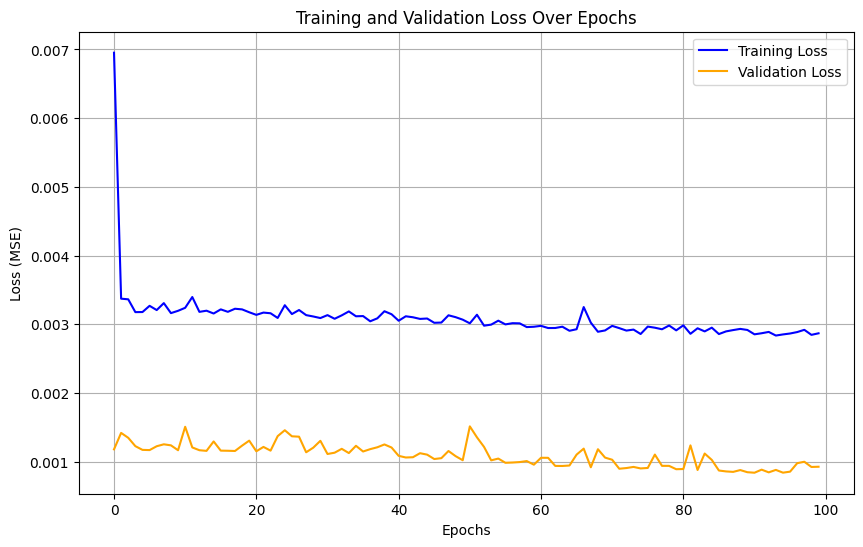

In [9]:
# -------------------------------------
# Plot Training and Validation Loss
# -------------------------------------
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ (None, 128)                 │          50,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_11 (GRU)                         │ (None, 7, 128)              │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 7, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,505 (584.00 KB)

 Trainable params: 149,505 (584.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0137 - val_loss: 0.0020
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0029 - val_loss: 0.0013
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0031 - val_loss: 0.0013
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0

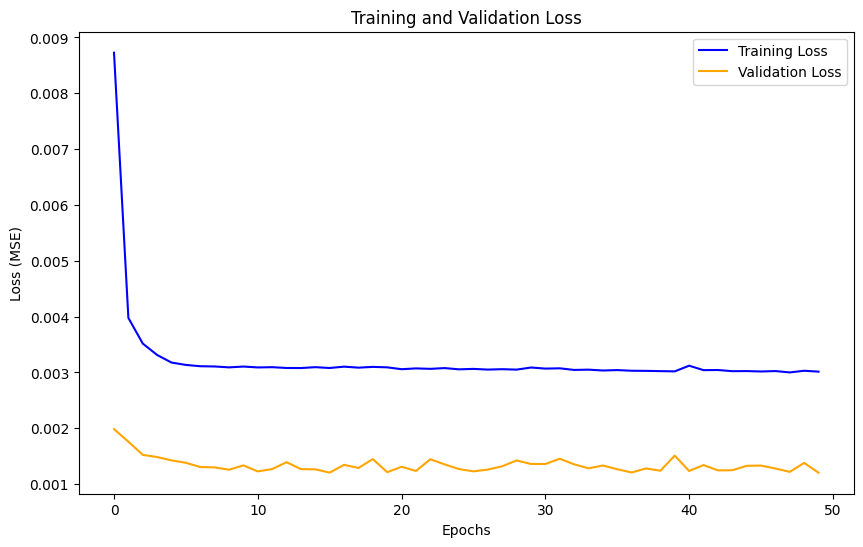

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step


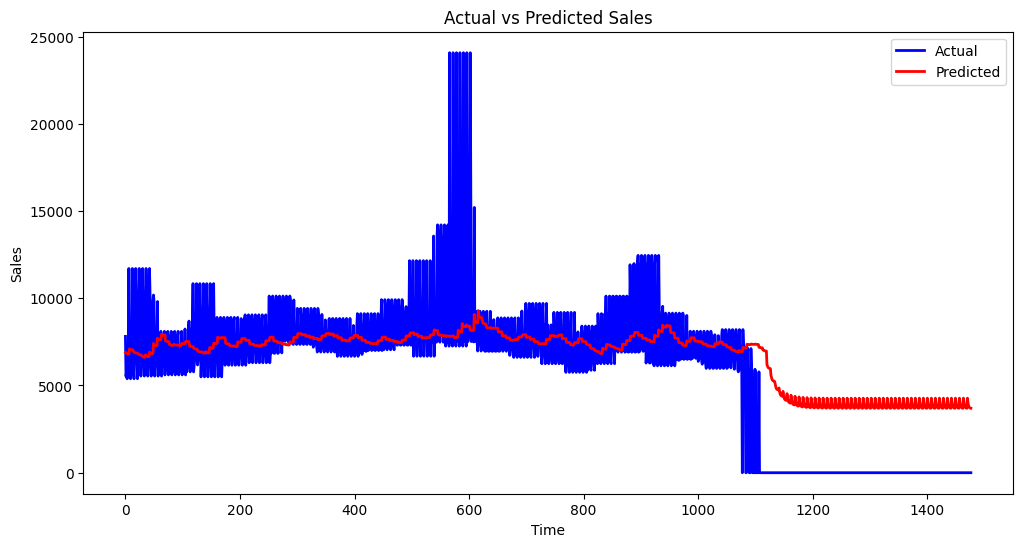

Test MSE: 8165306.4612
Test MSE: 2074.9995
Test MSE: 0.4690


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# ------------------------------
# Step 1: Data Preprocessing
# ------------------------------

# Example: Using your df_pandas['y'] as the time series
data = df_pandas['y'].values.reshape(-1, 1)

# Scaling data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, input_len, output_len):
    X, y = [], []
    for i in range(len(data) - input_len - output_len):
        X.append(data[i:i + input_len])
        y.append(data[i + input_len:i + input_len + output_len])
    return np.array(X), np.array(y)

# Define sequence lengths
input_seq_len = 30  # e.g., past 30 days
output_seq_len = 7  # predict next 7 days

X, y = create_sequences(data_scaled, input_seq_len, output_seq_len)

# Train-test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ------------------------------
# Step 2: Build Encoder-Decoder GRU Model
# ------------------------------

# Encoder
encoder_inputs = Input(shape=(input_seq_len, 1))
encoder = GRU(128, activation='relu', return_sequences=False)(encoder_inputs)
encoder_output = RepeatVector(output_seq_len)(encoder)

# Decoder
decoder = GRU(128, activation='relu', return_sequences=True)(encoder_output)
decoder_outputs = TimeDistributed(Dense(1))(decoder)

# Compile Model
model = Model(encoder_inputs, decoder_outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

# ------------------------------
# Step 3: Train the Model
# ------------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# ------------------------------
# Step 4: Plot Training/Validation Loss
# ------------------------------
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# ------------------------------
# Step 5: Make Predictions
# ------------------------------
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# ------------------------------
# Step 6: Plot Actual vs Predicted
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled.flatten(), label='Actual', color='blue', linewidth=2)
plt.plot(y_pred_rescaled.flatten(), label='Predicted', color='red', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ------------------------------
# Step 7: Evaluation Metrics
# ------------------------------
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae=mean_absolute_error(y_test_rescaled, y_pred_rescaled)
r2=r2_score(y_test_rescaled, y_pred_rescaled)
print(f"Test MSE: {mse:.4f}")
print(f"Test MSE: {mae:.4f}")
print(f"Test MSE: {r2:.4f}")
